# Regression Multiple 


In [65]:
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [83]:
x,y = datasets.make_regression(n_samples=100,n_features=1,noise=10)
y = abs(y/2)

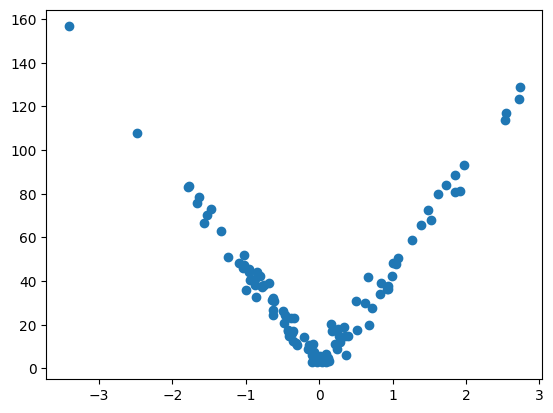

In [67]:
plt.scatter(x,y)

In [99]:
y = y.reshape(-1,1)
X = np.hstack((np.ones(x.shape),x))
X = np.hstack((X,(x ** 2)))
Theta = np.random.randn(3,1)
print(Theta)

[[0.53003666]
 [0.26950815]
 [1.36730612]]


## Model de régression

In [91]:
def model(X,Theta):
    ret = X @ Theta
    return ret

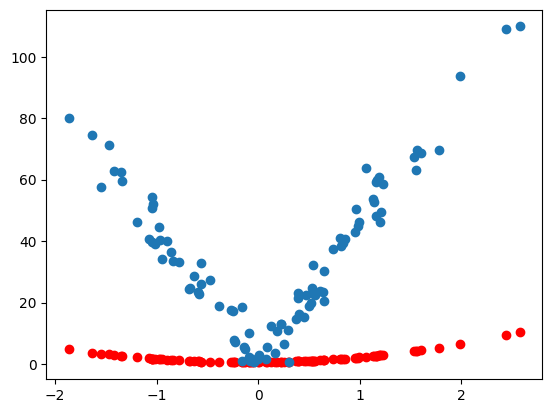

In [101]:
plt.scatter(x,model(X,Theta),c="red")
plt.scatter(x,y)

## Fonction coût(MSE):

$$
J(\theta) = \frac{1}{2m} \left( \mathbf{y} - \mathbf{X} \boldsymbol{\theta} \right)^T \left( \mathbf{y} - \mathbf{X} \boldsymbol{\theta} \right)
$$



In [102]:
def cost(x,y,Theta):
    m = len(y)
    result = 1/(2*m) * np.sum((model(X,Theta) - y) ** 2)
    return result
print(f" cout:",cost(x,y,Theta))

 cout: 787.7906353708454


## Descend de gradients

- Gradient de la fonction coût:

$$
\mathbf{\nabla_{\theta}} J(\theta) = \frac{1}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$

- Mise à jour des paramètres avec la descente de gradient :

$$
\boldsymbol{\theta} := \boldsymbol{\theta} - \alpha \cdot \mathbf{\nabla_{\theta}} J(\theta)
$$






In [94]:
def gradient(X,y,Theta):
    m = len(y)
    result = 1/m * X.T.dot(model(X,Theta) - y)
    return result

In [95]:
def gradient_descent(X,y,Theta,learning_rate,n):
    for _ in range(0,n):
        Theta = Theta - (learning_rate * gradient(X,y,Theta))
    return Theta

In [113]:
Theta_final = gradient_descent(X,y,Theta,0.0001,100000)
print(Theta_final)

[[17.05509862]
 [-0.84469184]
 [19.53760821]]


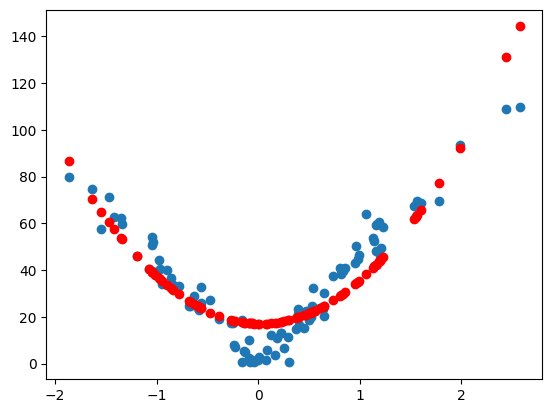

In [114]:
y_final = model(X,Theta_final)
plt.scatter(x,y)
plt.scatter(x,y_final,c="red")